In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("SRE_data.csv")

In [5]:
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,75.60,76.190,75.40,76.14,767226,SRE
1,2013-02-11,76.02,76.138,75.57,75.76,599953,SRE
2,2013-02-12,75.77,75.940,75.49,75.83,750838,SRE
3,2013-02-13,75.80,76.390,75.58,76.33,608662,SRE
4,2013-02-14,76.20,76.500,75.31,75.35,1248983,SRE


In [6]:
data.drop("Name",axis=1,inplace=True)

In [7]:
data.shape

(1259, 6)

In [8]:
data_col=["open","high","low","close"]

In [9]:
data.head()

,date,open,high,low,close,volume
0,2013-02-08,75.60,76.190,75.40,76.14,767226
1,2013-02-11,76.02,76.138,75.57,75.76,599953
2,2013-02-12,75.77,75.940,75.49,75.83,750838
3,2013-02-13,75.80,76.390,75.58,76.33,608662
4,2013-02-14,76.20,76.500,75.31,75.35,1248983


In [10]:
data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [11]:
df=data.drop("date",axis=1)

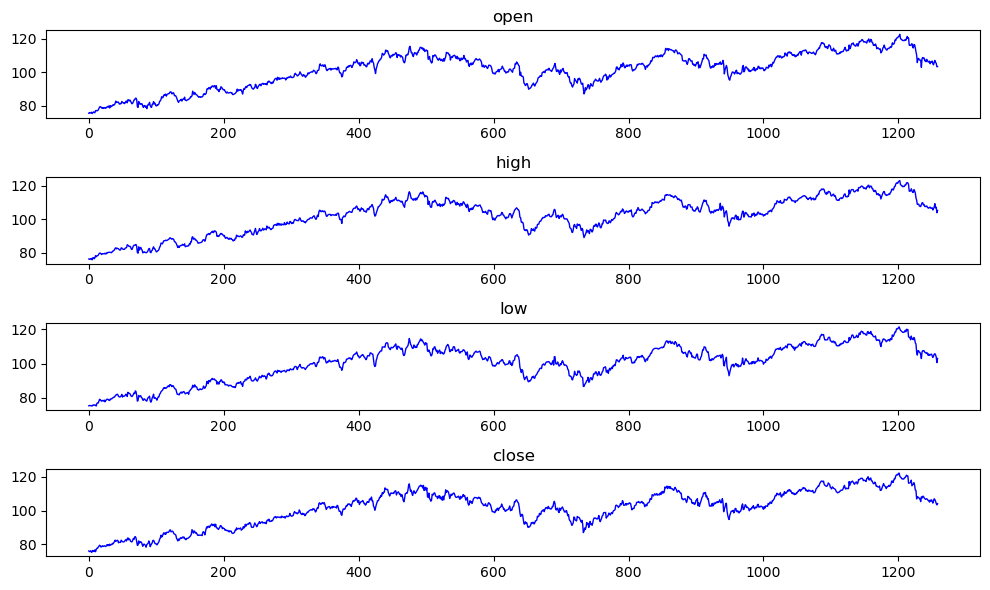

In [12]:
fig,axes=plt.subplots(4,1,dpi=100,figsize=(10,6))
for i,ax in enumerate(axes.flatten()):
    dataa=df[df.columns[i]]
    ax.plot(dataa,color="b",linewidth=1)
    ax.set_title(df.columns[i])
    
plt.tight_layout();

<AxesSubplot:>

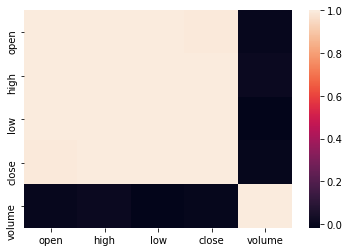

In [13]:
sns.heatmap(data.corr())

In [14]:
df=data.reset_index()["close"]

In [15]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler(feature_range=(0,1))
df1=scale.fit_transform(np.array(df).reshape(-1,1))

In [16]:
train_data=int(len(df1)*0.70)
test_data=len(df1)-train_data
train_data=df1[:-test_data]
test_data=df1[-test_data:]

In [17]:
def create_dataset(dataset,time_step=1):
    datax,datay=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        datax.append(a)
        datay.append(dataset[i+time_step,0])
    return np.array(datax),np.array(datay)

In [18]:
time_step=100
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [19]:
(x_train.shape,y_train.shape)

((780, 100), (780,))

In [20]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

In [24]:
model.compile(loss="mean_squared_error",optimizer="adam",metrics=["accuracy"])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
epochs=100
batch_size=64
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=epochs,batch_size=batch_size,verbose=1)

Epoch 1/100
13/13 [==============================] - 18s 506ms/step - loss: 0.0898 - accuracy: 0.0000e+00 - val_loss: 0.0534 - val_accuracy: 0.0036
Epoch 2/100
13/13 [==============================] - 4s 332ms/step - loss: 0.0158 - accuracy: 0.0000e+00 - val_loss: 0.0046 - val_accuracy: 0.0036
Epoch 3/100
13/13 [==============================] - 4s 335ms/step - loss: 0.0085 - accuracy: 0.0000e+00 - val_loss: 0.0119 - val_accuracy: 0.0036
Epoch 4/100
13/13 [==============================] - 4s 334ms/step - loss: 0.0057 - accuracy: 0.0000e+00 - val_loss: 0.0126 - val_accuracy: 0.0036
Epoch 5/100
13/13 [==============================] - 4s 326ms/step - loss: 0.0045 - accuracy: 0.0000e+00 - val_loss: 0.0049 - val_accuracy: 0.0036
Epoch 6/100
13/13 [==============================] - 4s 323ms/step - loss: 0.0039 - accuracy: 0.0000e+00 - val_loss: 0.0037 - val_accuracy: 0.0036
Epoch 7/100
13/13 [==============================] - 4s 328ms/step - loss: 0.0035 - accuracy: 0.0000e+00 - val_loss: 

13/13 [==============================] - 4s 313ms/step - loss: 0.0014 - accuracy: 0.0000e+00 - val_loss: 0.0013 - val_accuracy: 0.0036
Epoch 57/100
13/13 [==============================] - 4s 309ms/step - loss: 0.0013 - accuracy: 0.0000e+00 - val_loss: 0.0012 - val_accuracy: 0.0036
Epoch 58/100
13/13 [==============================] - 4s 302ms/step - loss: 0.0012 - accuracy: 0.0000e+00 - val_loss: 0.0012 - val_accuracy: 0.0036
Epoch 59/100
13/13 [==============================] - 4s 308ms/step - loss: 0.0014 - accuracy: 0.0000e+00 - val_loss: 0.0023 - val_accuracy: 0.0036
Epoch 60/100
13/13 [==============================] - 4s 309ms/step - loss: 0.0013 - accuracy: 0.0000e+00 - val_loss: 8.8629e-04 - val_accuracy: 0.0036
Epoch 61/100
13/13 [==============================] - 4s 314ms/step - loss: 0.0011 - accuracy: 0.0000e+00 - val_loss: 0.0010 - val_accuracy: 0.0036
Epoch 62/100
13/13 [==============================] - 4s 312ms/step - loss: 0.0012 - accuracy: 0.0000e+00 - val_loss: 0.0

In [27]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [28]:
train_predict=scale.inverse_transform(train_predict)
test_predict=scale.inverse_transform(test_predict)

In [35]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

99.16274457018568

In [30]:
math.sqrt(mean_squared_error(y_test,test_predict))

110.44984883199301

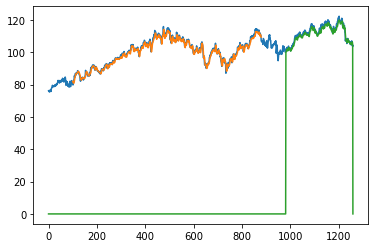

In [36]:
look_back=100
trainPredictPlot=np.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict
testPredictPlot=np.empty_like(df1)
testPredictPlot[:,:]=np.empty_like(df1)
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1]=test_predict
plt.plot(scale.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()                                                       

In [37]:
len(test_data)

378

In [38]:
x_input=test_data[278:].reshape(1,-1)
x_input.shape

(1, 100)

In [39]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [40]:
import array
lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape(1,n_steps,1)
        yhat=model.predict(x_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

[0.59023273]
101
1 day input [0.90251706 0.90081058 0.87947952 0.86518771 0.86582765 0.88587884
 0.87265358 0.83511092 0.83681741 0.82721843 0.82401877 0.82167235
 0.83639078 0.7822099  0.78071672 0.79522184 0.82039249 0.84449659
 0.86625427 0.84300341 0.83425768 0.82529863 0.80418089 0.82636519
 0.82721843 0.83361775 0.84492321 0.83169795 0.84812287 0.85942833
 0.89803754 0.8991041  0.88054608 0.90571672 0.93067406 0.92832765
 0.96352389 0.97440273 0.9818686  0.97653584 0.99424061 1.
 0.96117747 0.94944539 0.94197952 0.92683447 0.92726109 0.92384812
 0.92470137 0.94027304 0.9434727  0.95797782 0.97354949 0.96267065
 0.96288396 0.87180034 0.87372014 0.87627986 0.88182594 0.91040956
 0.83916382 0.8508959  0.86241468 0.87841297 0.84726962 0.78583618
 0.7802901  0.67320819 0.70307167 0.69517918 0.69283276 0.67683447
 0.6734215  0.63993174 0.69944539 0.68408703 0.70605802 0.70669795
 0.68835324 0.67918089 0.66872867 0.67278157 0.67640785 0.66638225
 0.65422355 0.65358362 0.63353242 0.65848

 0.56825751 0.56338799 0.55836755 0.55323434]
10 day output [[0.54803467]]
11 day input [0.82401877 0.82167235 0.83639078 0.7822099  0.78071672 0.79522184
 0.82039249 0.84449659 0.86625427 0.84300341 0.83425768 0.82529863
 0.80418089 0.82636519 0.82721843 0.83361775 0.84492321 0.83169795
 0.84812287 0.85942833 0.89803754 0.8991041  0.88054608 0.90571672
 0.93067406 0.92832765 0.96352389 0.97440273 0.9818686  0.97653584
 0.99424061 1.         0.96117747 0.94944539 0.94197952 0.92683447
 0.92726109 0.92384812 0.92470137 0.94027304 0.9434727  0.95797782
 0.97354949 0.96267065 0.96288396 0.87180034 0.87372014 0.87627986
 0.88182594 0.91040956 0.83916382 0.8508959  0.86241468 0.87841297
 0.84726962 0.78583618 0.7802901  0.67320819 0.70307167 0.69517918
 0.69283276 0.67683447 0.6734215  0.63993174 0.69944539 0.68408703
 0.70605802 0.70669795 0.68835324 0.67918089 0.66872867 0.67278157
 0.67640785 0.66638225 0.65422355 0.65358362 0.63353242 0.65848976
 0.64697099 0.66232935 0.64377133 0.62073

19 day output [[0.5041517]]
20 day input [0.84300341 0.83425768 0.82529863 0.80418089 0.82636519 0.82721843
 0.83361775 0.84492321 0.83169795 0.84812287 0.85942833 0.89803754
 0.8991041  0.88054608 0.90571672 0.93067406 0.92832765 0.96352389
 0.97440273 0.9818686  0.97653584 0.99424061 1.         0.96117747
 0.94944539 0.94197952 0.92683447 0.92726109 0.92384812 0.92470137
 0.94027304 0.9434727  0.95797782 0.97354949 0.96267065 0.96288396
 0.87180034 0.87372014 0.87627986 0.88182594 0.91040956 0.83916382
 0.8508959  0.86241468 0.87841297 0.84726962 0.78583618 0.7802901
 0.67320819 0.70307167 0.69517918 0.69283276 0.67683447 0.6734215
 0.63993174 0.69944539 0.68408703 0.70605802 0.70669795 0.68835324
 0.67918089 0.66872867 0.67278157 0.67640785 0.66638225 0.65422355
 0.65358362 0.63353242 0.65848976 0.64697099 0.66232935 0.64377133
 0.62073379 0.65017065 0.67555461 0.66510239 0.64483788 0.61646758
 0.59833618 0.61305461 0.59023273 0.58808929 0.58527321 0.58160877
 0.57742763 0.57294846 

28 day output [[0.46923718]]
29 day input [0.84812287 0.85942833 0.89803754 0.8991041  0.88054608 0.90571672
 0.93067406 0.92832765 0.96352389 0.97440273 0.9818686  0.97653584
 0.99424061 1.         0.96117747 0.94944539 0.94197952 0.92683447
 0.92726109 0.92384812 0.92470137 0.94027304 0.9434727  0.95797782
 0.97354949 0.96267065 0.96288396 0.87180034 0.87372014 0.87627986
 0.88182594 0.91040956 0.83916382 0.8508959  0.86241468 0.87841297
 0.84726962 0.78583618 0.7802901  0.67320819 0.70307167 0.69517918
 0.69283276 0.67683447 0.6734215  0.63993174 0.69944539 0.68408703
 0.70605802 0.70669795 0.68835324 0.67918089 0.66872867 0.67278157
 0.67640785 0.66638225 0.65422355 0.65358362 0.63353242 0.65848976
 0.64697099 0.66232935 0.64377133 0.62073379 0.65017065 0.67555461
 0.66510239 0.64483788 0.61646758 0.59833618 0.61305461 0.59023273
 0.58808929 0.58527321 0.58160877 0.57742763 0.57294846 0.56825751
 0.56338799 0.55836755 0.55323434 0.54803467 0.54281706 0.53762621
 0.53249967 0.527466

In [41]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [42]:
df2=df1.tolist()
df2.extend(lst_output)

In [43]:
len(df1)

1259

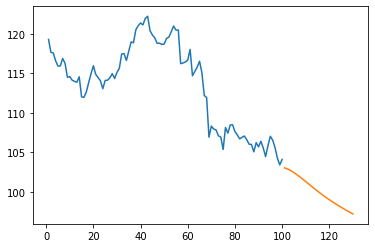

In [44]:
plt.plot(day_new,scale.inverse_transform(df1[1159:]))
plt.plot(day_pred,scale.inverse_transform(lst_output))

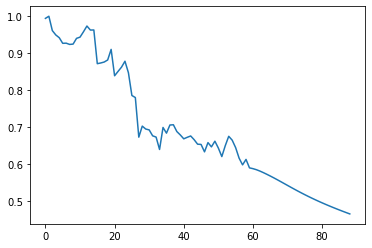

In [49]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [50]:
import requests
url ="http://192.168.0.101:9696/"
c = url.post(url,jason = stock_config)
r.text.strip()

AttributeError: 'str' object has no attribute 'post'